# Exercise 6
### Problem 1
Clustering using GrLivArea and GarageArea

In [52]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [53]:
# Import the complete dataset “train.csv” in Jupyter
houseData = pd.read_csv('../data files/train.csv')
# Extract the two variables in consideration from the dataset
X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])

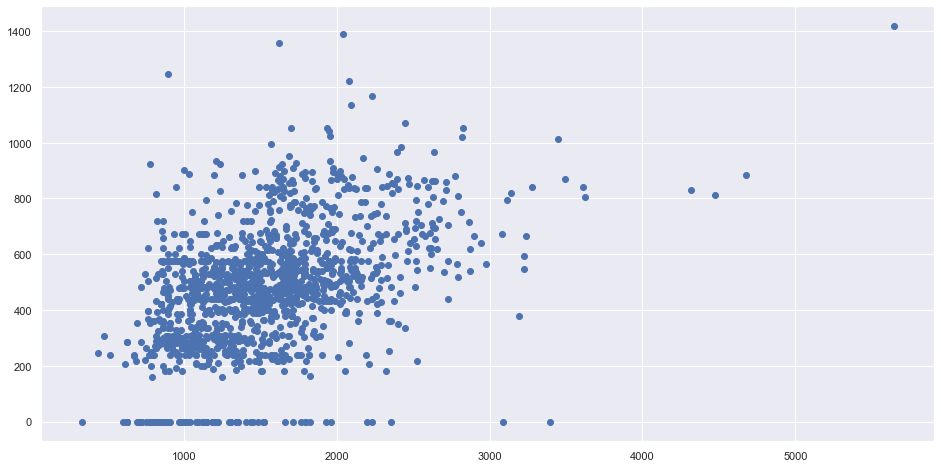

In [54]:
# Visualize the 2D distribution of the two variables extracted above, using a standard scatter
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", data = X)

In [55]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

In [56]:
# Guess the number of clusters from the 2D scatterplot, and perform k-Means clustering with that

# Guess the Number of Clusters
num_clust = 4

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=4)

In [57]:
# Print the Cluster Centers
print("Features", "\tGrLivArea", "\tGarageArea")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t\t")
    print()

Features 	GrLivArea 	GarageArea

Cluster 0:	2856.35		708.44		
Cluster 1:	1516.04		478.45		
Cluster 2:	1015.82		355.1		
Cluster 3:	2012.77		601.84		


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='count'>

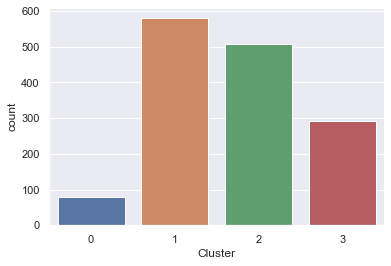

In [58]:
# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

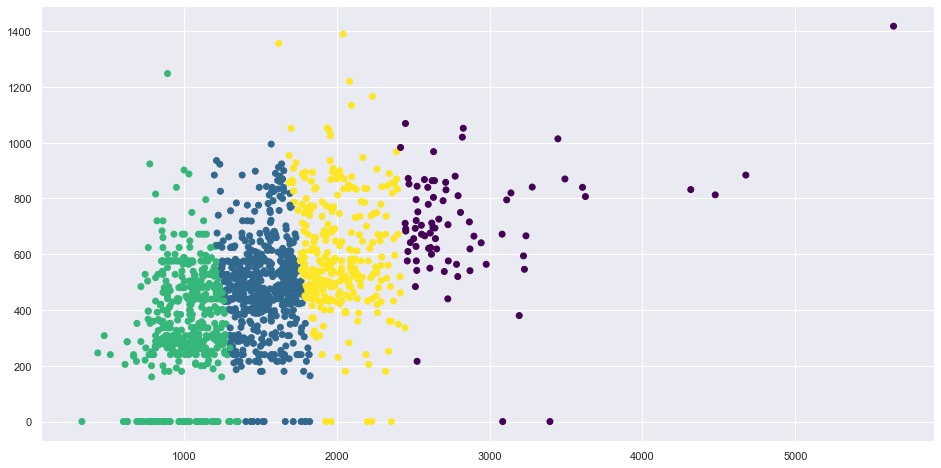

In [59]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)

In [60]:
# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)

Within Cluster Sum of Squares : 110333415.2643035


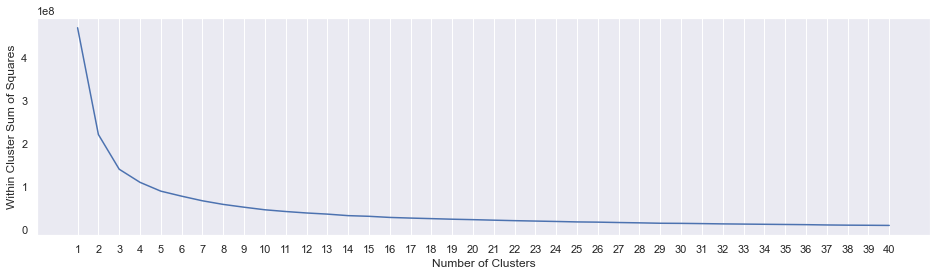

In [61]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

Cluster 0:	1068.03	544.89	
Cluster 1:	1752.16	804.32	
Cluster 2:	931.99	230.54	
Cluster 3:	2744.28	707.49	
Cluster 4:	1383.74	414.24	
Cluster 5:	4777.5	986.75	
Cluster 6:	2142.88	547.01	
Cluster 7:	1713.42	443.23	

Within Cluster Sum of Squares : 58960950.10063758



/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='count'>

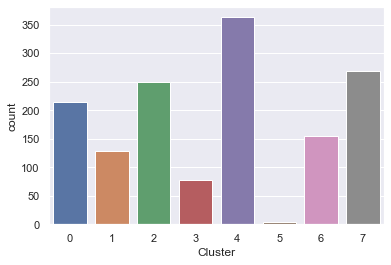

In [63]:
# from Within SS vs Number of Clusters Plot (8 clusters seem like a good number)

# Set "optimal" Number of Clusters
num_clust = 8

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

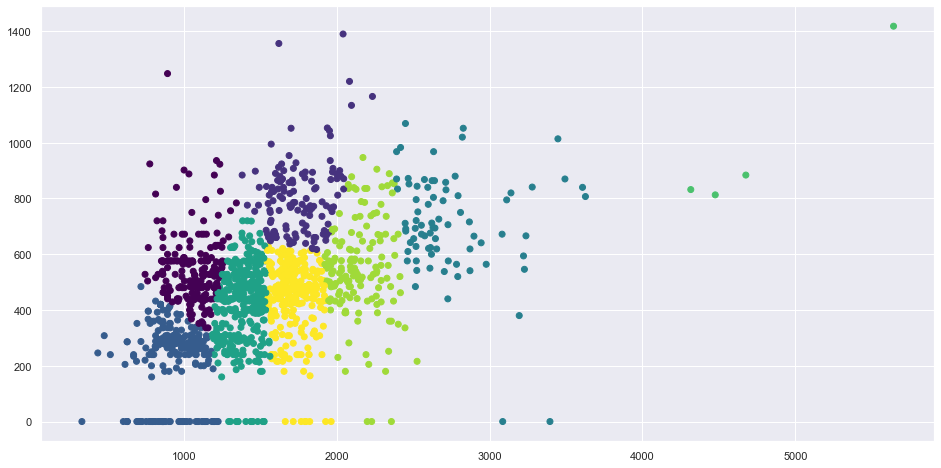

In [64]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)

<AxesSubplot:xlabel='GarageArea', ylabel='Cluster'>

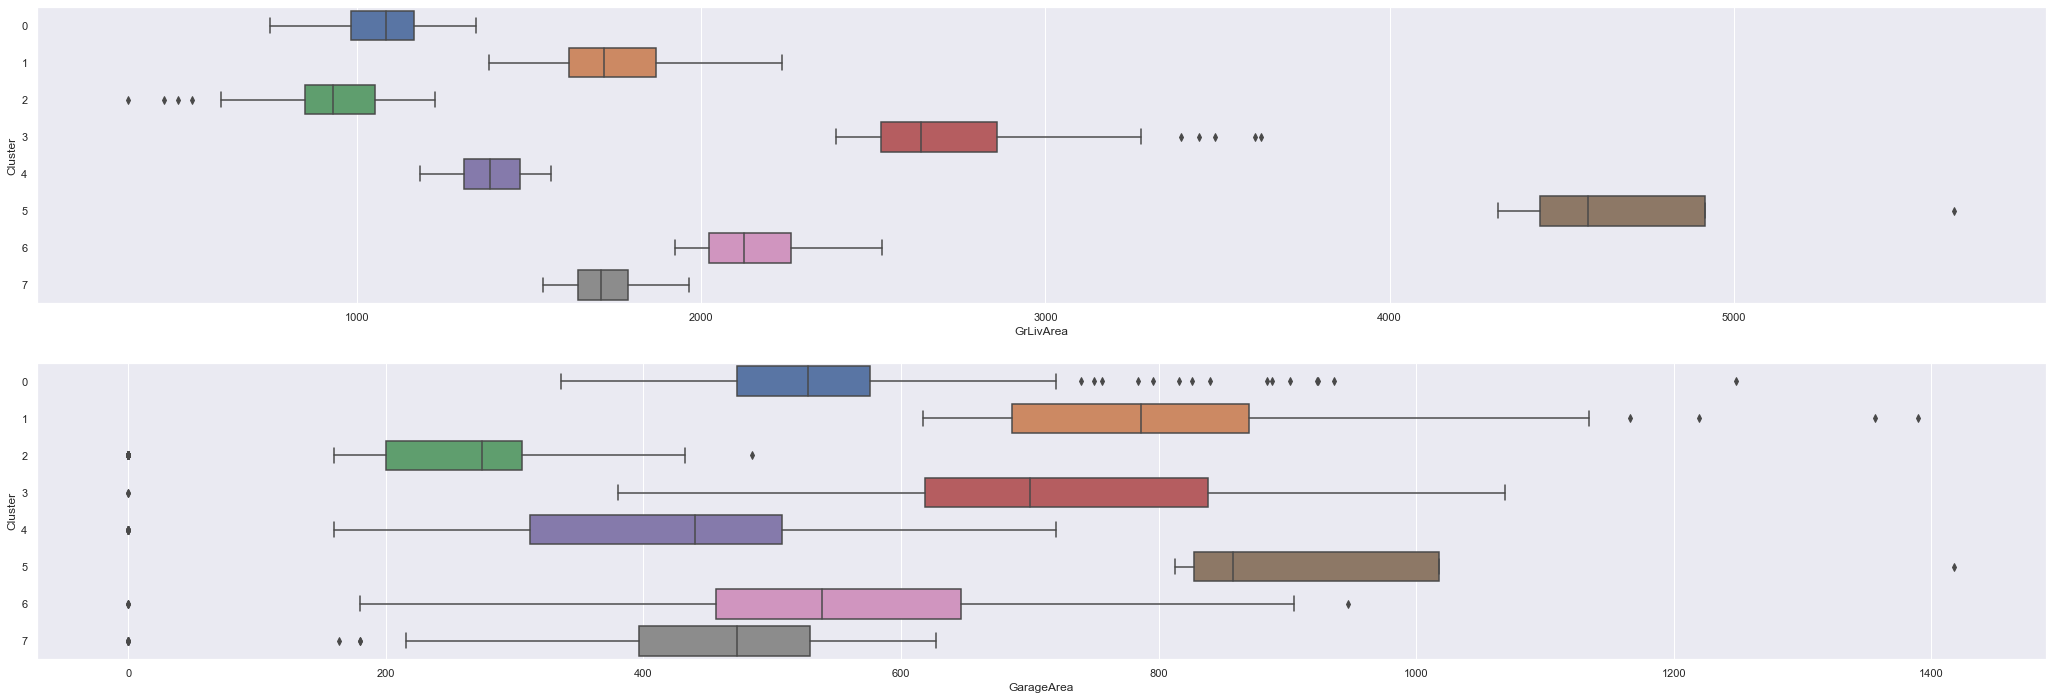

In [67]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(36,12))
sb.boxplot(x = 'GrLivArea', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'GarageArea', y = 'Cluster', data = X_labeled, ax = axes[1])

<AxesSubplot:xlabel='Cluster'>

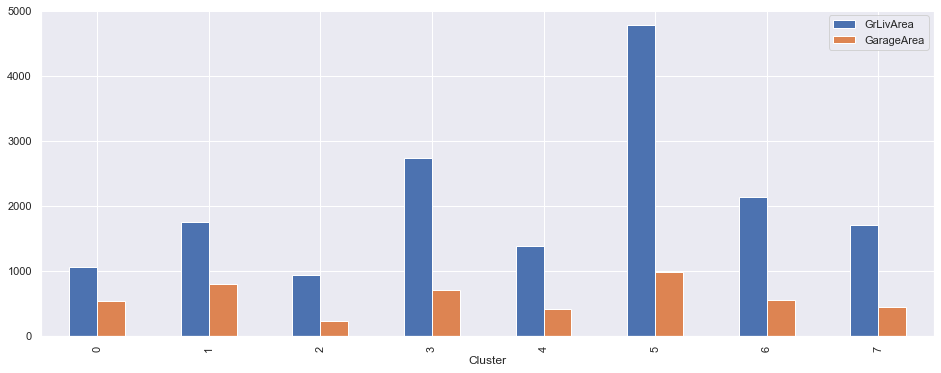

In [66]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

### Problem 2
Anomaly Detection with the same Variables

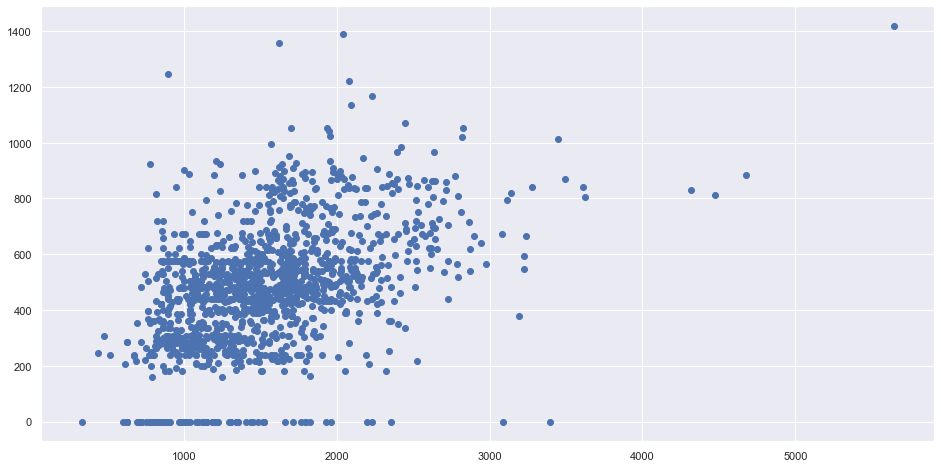

In [68]:
# Already extraction GrLivArea and GarageArea into X from Problem 1

# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", data = X)

In [91]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 30      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(contamination=0.05, n_neighbors=30)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Anomaly', ylabel='count'>

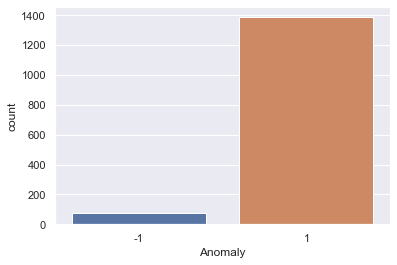

In [92]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

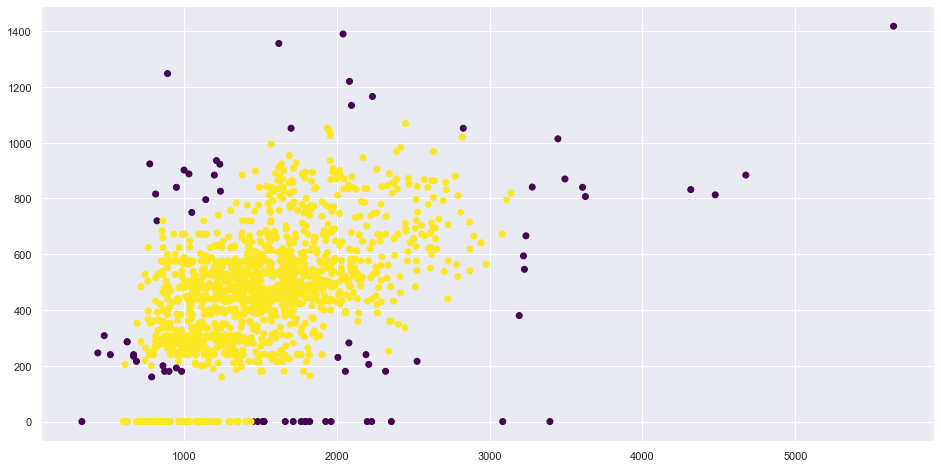

In [93]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Anomaly", cmap = 'viridis', data = X_labeled)

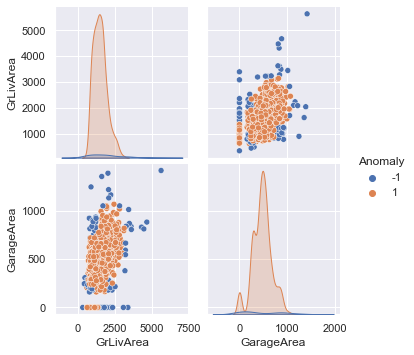

In [94]:
# Visualize the Anomalies in the Data
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Anomaly")

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='GarageArea', ylabel='Anomaly'>

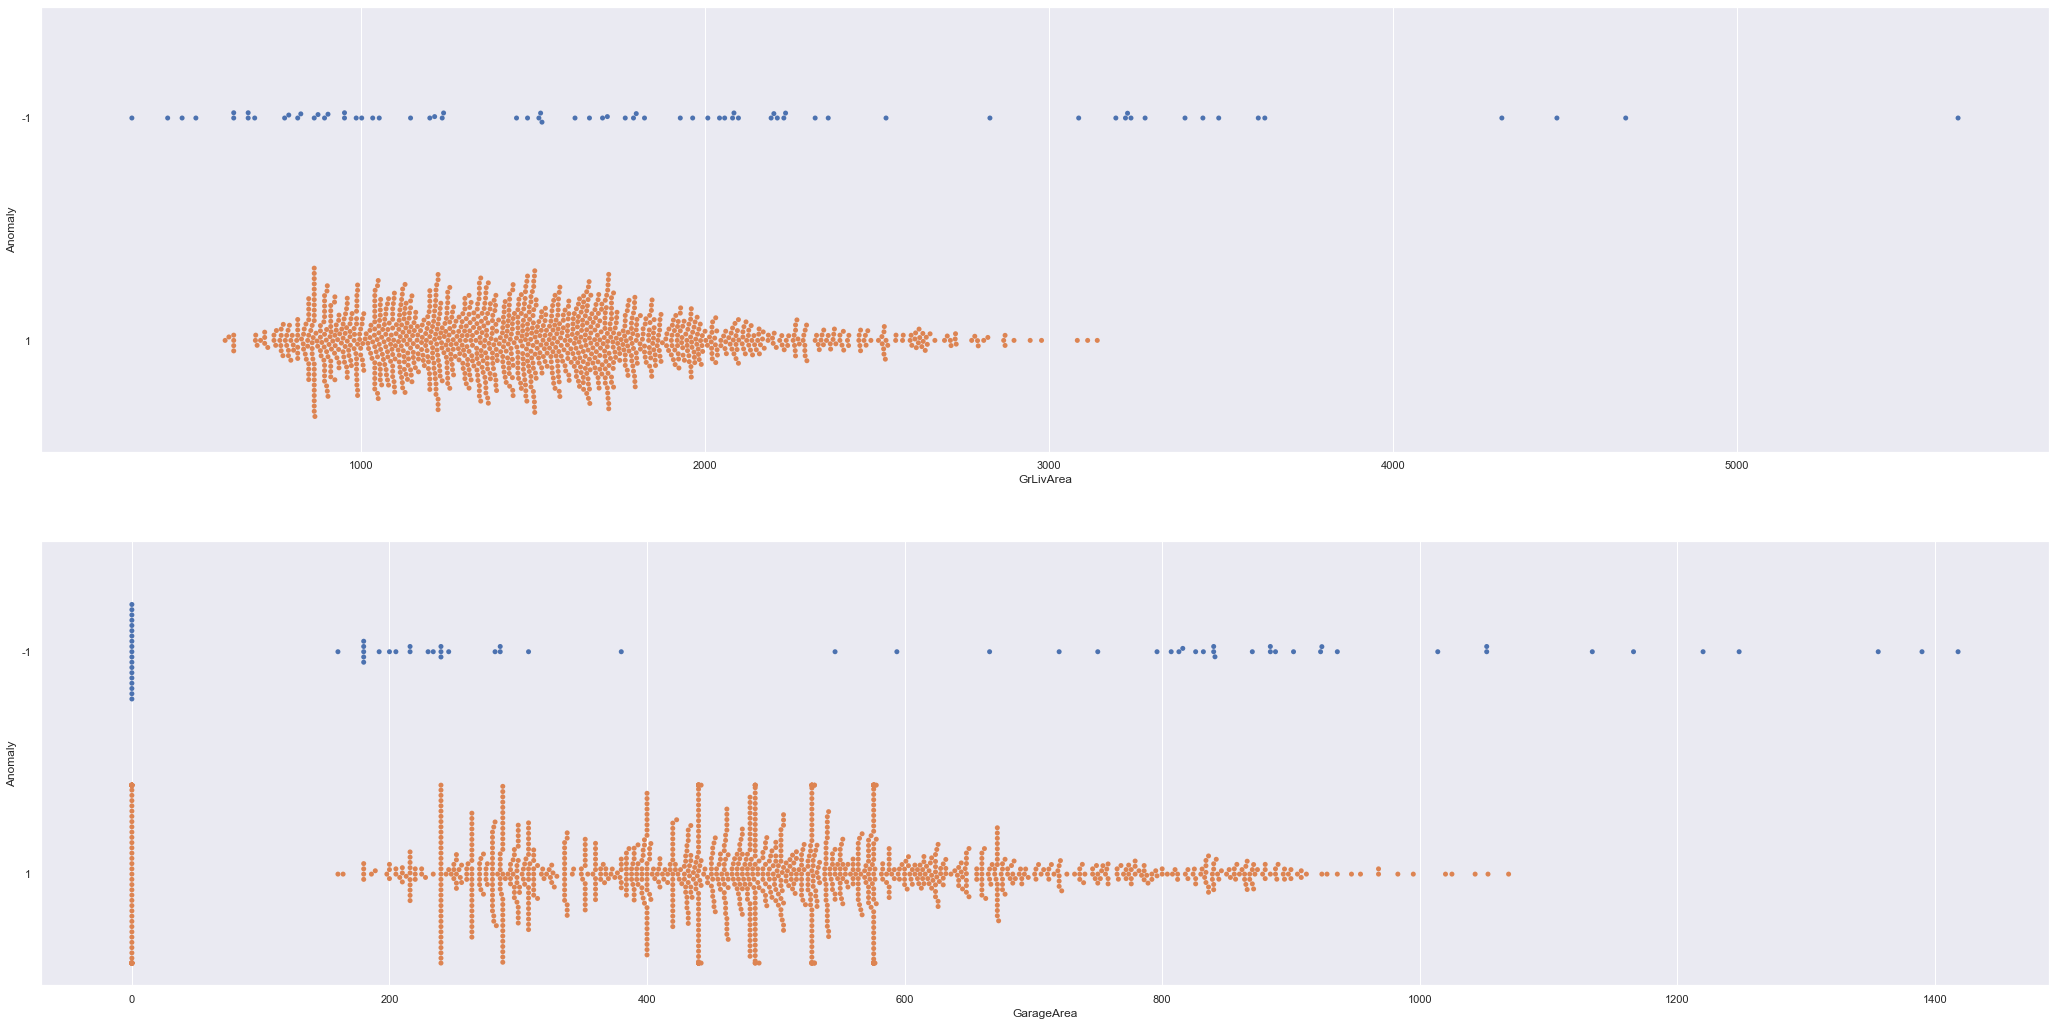

In [95]:
# Interpretting the Anomalies

# Boxplots for the Features for the Anomalies
f, axes = plt.subplots(2, 1, figsize=(36,18))
sb.swarmplot(x = 'GrLivArea', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.swarmplot(x = 'GarageArea', y = 'Anomaly', data = X_labeled, ax = axes[1])

<AxesSubplot:xlabel='GarageArea', ylabel='Anomaly'>

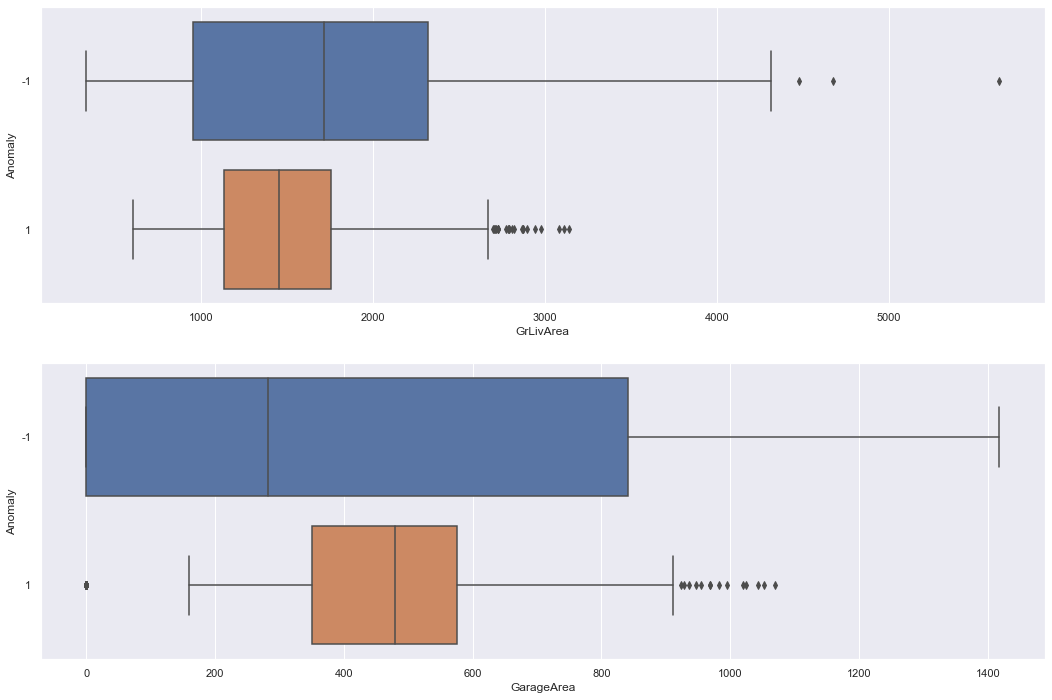

In [96]:
# Boxplots for all Features against the Anomalies
f, axes = plt.subplots(2, 1, figsize=(18,12))
sb.boxplot(x = 'GrLivArea', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'GarageArea', y = 'Anomaly', data = X_labeled, ax = axes[1])